<a href="https://colab.research.google.com/github/Bhanishi-at-Github/ML-practice/blob/main/SPAM_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM Filtering Module:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mails = pd.read_csv('https://raw.githubusercontent.com/gurudattamanpreet/datasets/refs/heads/main/SMSSpamCollection.csv', sep='\t')

In [ ]:
mails.columns = ['Label', 'Message']
mails.head()

,Label,Message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
mails.shape

(5571, 2)

In [ ]:
mails['Label'].value_counts()

,count
Label,
ham,4824
spam,747


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler


df = mails.copy()

In [ ]:
oversample= RandomOverSampler(sampling_strategy=1)
df,df['Label']= oversample.fit_resample(df,df['Label'])

In [ ]:
df.shape

(9648, 2)

In [ ]:
# Clean text
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['Message'].apply(clean_text)
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Label,Message,cleaned_text
0,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
2,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
3,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl week word back like fun still...


In [ ]:
# Count Vectorization
vector = TfidfVectorizer(max_features=4000)
X = vector.fit_transform(df['cleaned_text']).toarray()
y = df['Label'].map({'ham': 0, 'spam': 1})

# Random Over Sampler
rs = SMOTE(random_state=1)
X_resampled, y_resampled = rs.fit_resample(X, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))

Test Accuracy: 0.9694300518134715
Train Accuracy: 0.9826379891163514


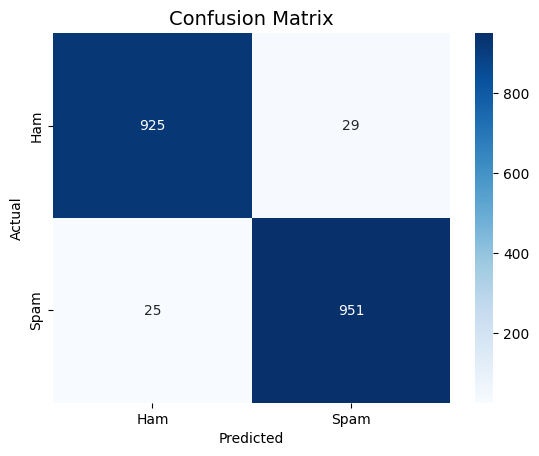

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       954
           1       0.97      0.97      0.97       976

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



In [ ]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

print(classification_report(y_test, y_pred))